# 1.0 IMPORT

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


warnings.filterwarnings('ignore')

## 1.1 Helper Fuctions

In [124]:
def grafdisplot(dt):
    sns.set(rc={'figure.figsize':(20, 10)})
    sns.distplot(dt, kde=True);
    
    return None


def boxplot1(x1, x2, x3, x4, y, df):
    
    plt.subplot(2, 2, 1)
    sns.boxplot(x=x1, y=y, data=df)

    plt.subplot(2, 2, 2)
    sns.boxplot(x=x2, y=y, data=df)

    plt.subplot(2, 2, 3)
    sns.boxplot(x=x3, y=y, data=df)

    plt.subplot(2, 2, 4)
    sns.boxplot(x=x4, y=y, data=df);

    return None

## 1.2 Loding data

In [45]:
df1 = pd.read_csv('data/kc_house_data.csv')

# 2.0 Passo 01 - DESCRIÇÃO DOS DADOS

In [15]:
df2 = df1.copy()

## 2.1 Data Dimensions

In [16]:
print('Number of Rows: {}'.format(df2.shape[0]))
print('Number of Cols: {}'.format(df2.shape[1]))

Number of Rows: 21613
Number of Cols: 21


## 2.2 Data Types

In [17]:
df2['date'] = pd.to_datetime(df2['date'])
df2.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

## 2.3 Check NA

In [18]:
df2.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## 2.4 Descriptive Statistical

### 2.4.1 Numerical Attributes

In [20]:
# Central Tendency - mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x : x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

# concatenate
con_ = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
con_.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis'] 

In [29]:
num_attributes = df2.select_dtypes(include=['int64', 'float64'])
num_attributes = num_attributes.drop(columns=['id', 'yr_built', 'yr_renovated', 'zipcode', 
                                              'view', 'lat', 'long'])

con_

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,price,75000.0,7700000.0,7625000.0,540088.141767,450000.00,367118.703181,4.024069,34.585540
1,bedrooms,0.0,33.0,33.0,3.370842,3.00,0.930040,1.974300,49.063653
2,bathrooms,0.0,8.0,8.0,2.114757,2.25,0.770145,0.511108,1.279902
3,sqft_living,290.0,13540.0,13250.0,2079.899736,1910.00,918.419649,1.471555,5.243093
4,sqft_lot,520.0,1651359.0,1650839.0,15106.967566,7618.00,41419.553273,13.060019,285.077820
5,floors,1.0,3.5,2.5,1.494309,1.50,0.539976,0.616177,-0.484723
6,waterfront,0.0,1.0,1.0,0.007542,0.00,0.086515,11.385108,127.632494
7,condition,1.0,5.0,4.0,3.409430,3.00,0.650728,1.032805,0.525764
8,grade,1.0,13.0,12.0,7.656873,7.00,1.175432,0.771103,1.190932
9,sqft_above,290.0,9410.0,9120.0,1788.390691,1560.00,828.071820,1.446664,3.402304


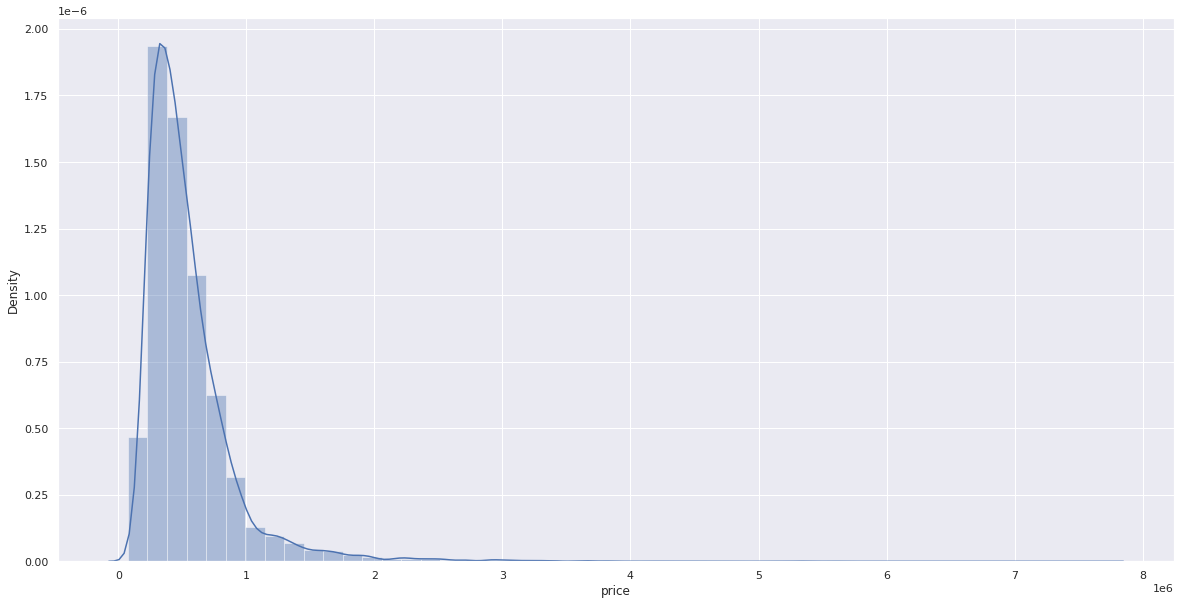

In [22]:
grafdisplot(df2['price'])

# 3.0 Passo 02 Criação das Hipoteses

### 3.1.1 Columns

- id :uma notação para uma casa

- date: a data foi vendida

- price: o preço é a meta de previsão

- bedrooms:Número de quartos / casa

- bathrooms: Número de banheiros / quartos

- sqft_living: metragem quadrada da casa

- sqft_lot: metragem quadrada do lote

- floors :Total de pisos (níveis) na casa

- waterfront :casa com vista para a beira-mar

- view: foi visualizado

- condition :quão boa é a condição geral

- grade: nota geral dada à unidade habitacional, com base no sistema de classificação de King County 

- sqft_above :metragem quadrada da casa além do porão

- sqft_basement: metragem quadrada do porão

- yr_built :Ano de construção

- yr_renovated :ano em que a casa foi reformada

- zipcode:código postal

- lat: coordenada de latitude

- long: coordenada de longitude

- sqft_living15 :Área da sala de estar em 2015 (implica-- algumas renovações) Isso pode ou não ter afetado o tamanho do lote

- sqft_lot15 :rea lotSize em 2015 (implica-- algumas renovações)

### 3.1.2 Hipoteses 

- H1: A maioria das casas com 3 quartos são acima da mediana do preço.
- H2: A maioria das casas com 3 quartos e 2 banheiros são acima da mediana do preço.
- H3: A maioria das casas a baixo da mediana de m² construídos são mais baratas.
- H4: Casas com com vista para água são 30% mais caros que a mediana do preço.
- H5: A maioria das casas com porão e 2 andares são mais caras que que a mediana do preço.
- H6: Casas com a data de construção igual ou menor que 1955 são 50% mais barato que a mediana do preço.
- H7: A maioria das casas com datas acima de 1990 que tiveram reformas são mais caras que a mediana.
- H8: A maioria das casas com 2 andares e 2 banheiros são mais caro que a mediana do preço.
- H9: A maioria das casas com m² de contrução e m² do lote abaixo da mediana são mais baratos caro que a mediana do preço.
- H10: A maioria das casas acima do ano 2000 de construção são mais caras que a mediana do preço.

# 4.0 Passo 03 - NEW CONSIDERABLE VARIABLES


In [54]:
df3 = df2.copy()

## 4.1 Real estate level

In [55]:
# Nível 0 == Preço entre R$ 0 e R$ 321.950
# Nível 1 == Preço entre R$ 321.950 e R$ 450.000
# Nível 2 == Preço entre R$ 450.000 e R$ 645.000
# Nível 3 == Preço acimsa R$ 645.000

df3['level'] = df3['price'].apply(lambda x: 'nivel_0' if (x >= 0) & (x < 321950) else 
                                  'nivel_1' if (x >= 321950) & (x < 450000) else 
                                  'nivel_2' if (x >= 450000) & (x < 645000) else 'nivel_3')


## 4.2 Dormitory type

In [56]:
# Studio == bedrooms igual ou menor que 1
# Apart_or_House == bedrooms entre 2 e 4
# house == bedrooms maior que 4

df3['dormitory_type'] = df3['bedrooms'].apply(lambda x: 'studio' if x <=1 else 
                                              'apart_or_house' if (x >=2) & (x <= 3) else 'house')

## 4.2 Condition type

In [57]:
# Bad == Se a condition for menor ou igual a 2
# Regular == Se a condition for igual a 3 ou 4
# Good == Se a condition for igual 5

df3['condition_type'] = df3['condition'].apply(lambda x: 'bad' if x <= 2 else 
                                               'regular' if (x == 3) | (x == 4) else 'good')

## 4.3 House age

In [58]:
# New_House == data maior que 2014-01-01
# Old_House == data menor que 2014-01-01

df3['data_age'] = df3['yr_built'].apply(lambda x: 'new_house' if x > 2014 
                                   else 'old_house')

## 4.4 Drop columns

In [59]:
df3 = df3.drop(columns=['sqft_living15', 'sqft_lot15'])

## 4.5 Categorical Attributes

In [61]:
cat_attributes = df3.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

In [62]:
cat_attributes.apply(lambda x: x.unique().shape[0])

level             4
dormitory_type    3
condition_type    3
data_age          2
dtype: int64

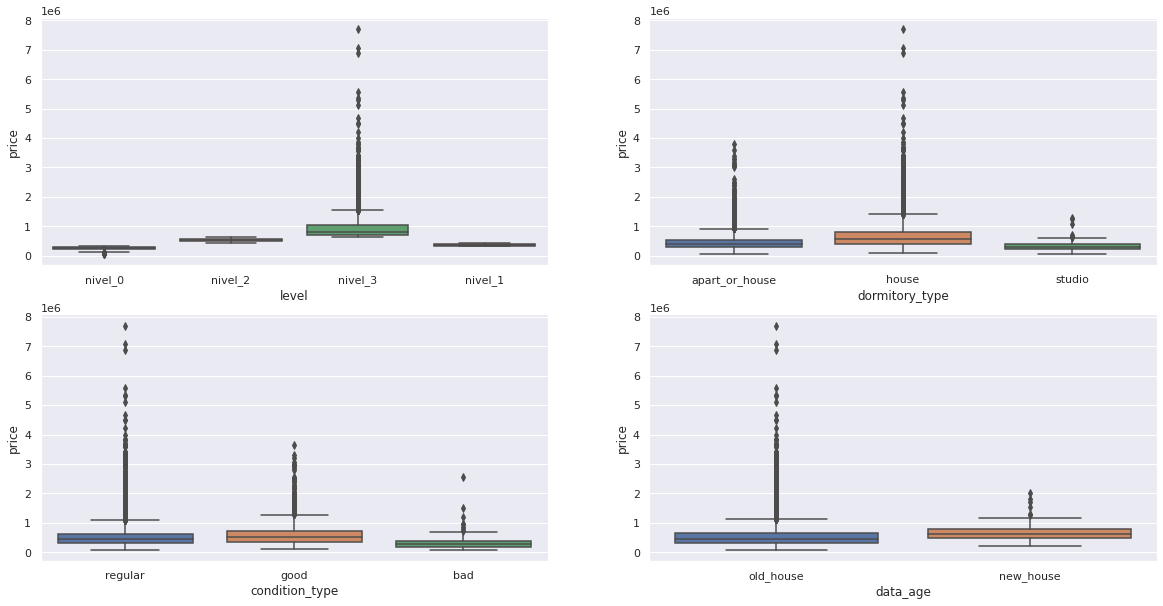

In [123]:
boxplot1('level', 'dormitory_type', 'condition_type', 'data_age', 'price', df3)